<a href="https://colab.research.google.com/github/airborne3586/Data_Analysis_EX_PORT/blob/main/HR_2%EC%B0%A8_%EA%B3%BC%EC%A0%9C_%ED%87%B4%EC%A7%81_%EC%B4%89%EB%B0%9C_%EC%9A%94%EC%9D%B8_%EB%B0%9C%EA%B5%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#utiliser GPU
import torch
device = torch.device("cuda")
torch.cuda.get_device_name(0)

'Tesla T4'

In [2]:
from google.colab import drive
import pandas as pd

# Google Drive 마운트
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import seaborn as sns


plt.rc('font', family='NanumBarunGothic')

# 퇴직을 촉발하는 주요 요인 발굴

In [4]:
# 파일 경로
file_path = '/content/drive/My Drive/Colab Notebooks/EX_port/hr_data.csv'

# 데이터 불러오기
df = pd.read_csv(file_path)

## 기본적인 특성 확인

In [5]:
# PerformanceRating 값별 count 계산
count_by_rating = df.groupby('Attrition').size()

print(count_by_rating)


Attrition
No     1233
Yes     237
dtype: int64


퇴직자는 237명이고 재직자는 1233명임을 확인

In [6]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### 1) 집과의 거리(DistanceFromHome)

#### 집과의 거리가 멀 수록 퇴사자가 많을 것이다?

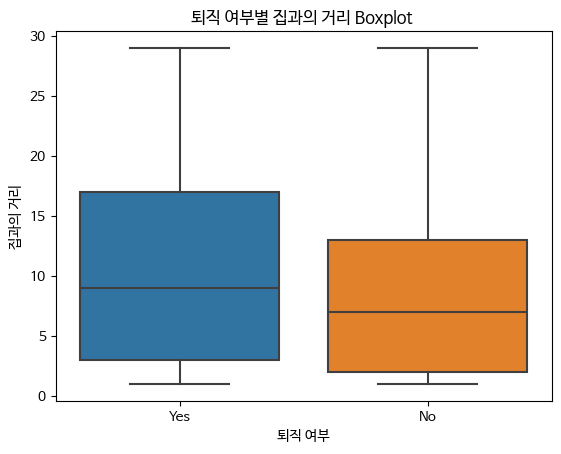

In [7]:
import seaborn as sns

#박스플롯
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)
plt.xlabel('퇴직 여부')
plt.ylabel('집과의 거리')
plt.title('퇴직 여부별 집과의 거리 Boxplot ')
plt.show()


상자그림을 보면 퇴사 집단의 평균을 볼때 퇴사집단의 집과의 거리 평균이 약간 더 멀다는 것을 볼 수 있다.또한 집과의 거리가 먼 쪽으로 분포되어 있다. 따라서 집과의 거리가 퇴직 여부에 어느정도 영향을 줄 가능성이 있다고 판단할 수 있다.

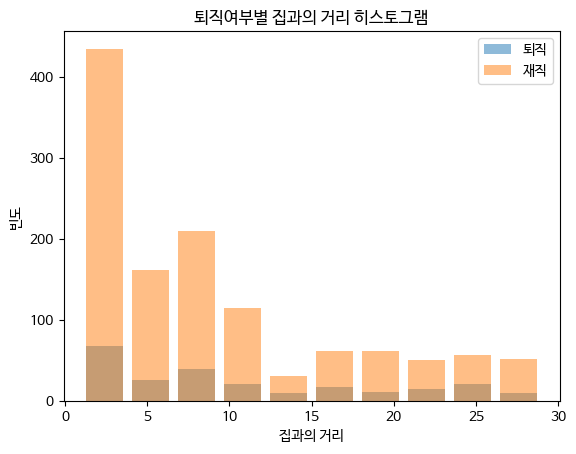

In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 데이터의 최소값과 최대값
min_value = df['DistanceFromHome'].min()
max_value = df['DistanceFromHome'].max()

# 구간의 수 계산
num_bins = 10

# 히스토그램 그리기
plt.hist(df[df['Attrition'] == 'Yes']['DistanceFromHome'], bins=num_bins, alpha=0.5, label='퇴직', rwidth=0.8)  # 막대 폭 설정
plt.hist(df[df['Attrition'] == 'No']['DistanceFromHome'], bins=num_bins, alpha=0.5, label='재직', rwidth=0.8)  # 막대 폭 설정
plt.xlabel('집과의 거리')
plt.ylabel('빈도')
plt.title('퇴직여부별 집과의 거리 히스토그램')
plt.legend()
plt.show()


### 2) 월소득(MonthlyIncome)

#### 월소득이 낮을 수록 퇴사자가 많을 것이다?



월소득이 높은 사람들은 퇴직하지 않을 가능성이 높다.
월소득이 높을수록 경제적인 안정성이 높아져 퇴직하지 않는 경향이 있다는 가정.


월소득이 낮은 사람들은 퇴직할 가능성이 높다.
이 가설은 월소득이 낮을수록 경제적인 어려움이 있어 퇴직할 가능성이 높다는 가정입니다.




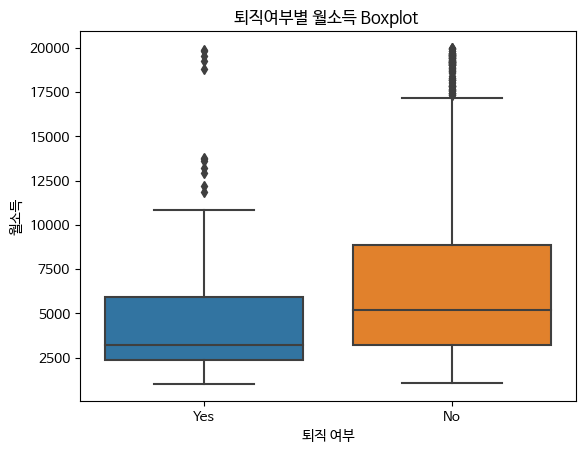

In [9]:
import seaborn as sns

#박스플롯
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.xlabel('퇴직 여부')
plt.ylabel('월소득')
plt.title('퇴직여부별 월소득 Boxplot ')
plt.show()


In [10]:
# 퇴직 여부에 따른 월소득 평균 계산
mean_income = df.groupby('Attrition')['MonthlyIncome'].mean()

print(mean_income)

Attrition
No     6832.739659
Yes    4787.092827
Name: MonthlyIncome, dtype: float64


Boxplot을 그려보았으나 이상치가 많아 이상치도 따로 확인해봐야 할 것 같다. 우선 Boxplot만 볼때 두 집단의 평균의 차이에 따라 월소득이 퇴직 여부에 충분한 영향을 줄 가능성이 있을 것으로 보인다. 또한 재직 집단의 월 소득 분포가 넓게 펼쳐져 있는 점을 보았을때 잠재적 퇴직자가도 있지 않을 까 하는 궁금증이 든다.

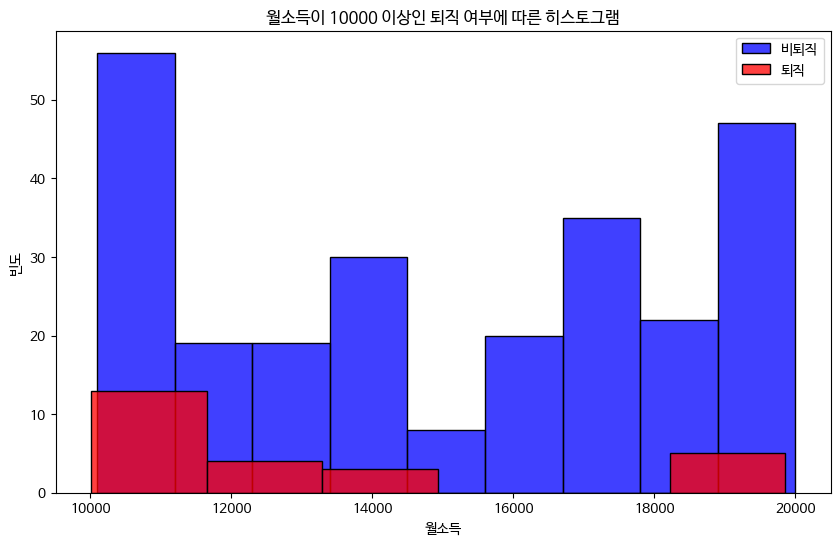

In [11]:
# 월소득이 10000 이상인 데이터 추출
income_above_10000 = df[df['MonthlyIncome'] >= 10000]

# 퇴직 여부에 따라 데이터 분류
attrition_yes = income_above_10000[income_above_10000['Attrition'] == 'Yes']
attrition_no = income_above_10000[income_above_10000['Attrition'] == 'No']

# 퇴직 여부에 따른 히스토그램 그리기
plt.figure(figsize=(10, 6))
sns.histplot(data=attrition_no, x='MonthlyIncome', color='blue', label='비퇴직')
sns.histplot(data=attrition_yes, x='MonthlyIncome', color='red', label='퇴직')

plt.xlabel('월소득')
plt.ylabel('빈도')
plt.title('월소득이 10000 이상인 퇴직 여부에 따른 히스토그램')
plt.legend()
plt.show()

월소득이  약 15000에서 18000의 구간에서 퇴직자가 없다. 왜 그럴까?

#### 3) 업무환경에 대한 만족도(EnvironmentSatisfaction)

#### 업무환경에 대한 만족도가 낮을 수록 퇴사자가 많을 것이다?

In [12]:
df['EnvironmentSatisfaction'].unique()

array([2, 3, 4, 1])

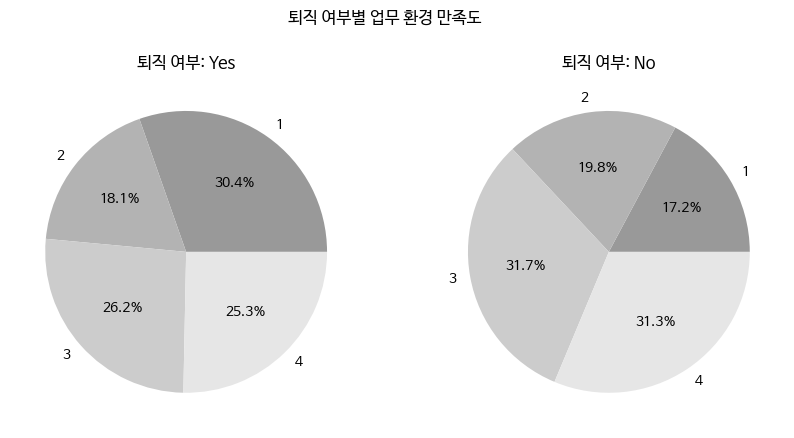

In [13]:
import matplotlib.pyplot as plt

# 퇴직 여부에 따른 업무 환경 만족도 데이터 추출
satisfaction_counts = df.groupby(['Attrition', 'EnvironmentSatisfaction']).size()

#퇴직 여부에 대한 업무 환경 만족도 데이터 추출
yes_satisfaction = satisfaction_counts['Yes']
no_satisfaction = satisfaction_counts['No']

# 파이 차트 그리기
plt.figure(figsize=(10, 5))

# 색상 설정
colors = ['#999999', '#B3B3B3', '#CCCCCC', '#E6E6E6']

plt.subplot(1, 2, 1)
plt.pie(yes_satisfaction, labels=yes_satisfaction.index, autopct='%1.1f%%',colors=colors)
plt.title('퇴직 여부: Yes')

plt.subplot(1, 2, 2)
plt.pie(no_satisfaction, labels=no_satisfaction.index, autopct='%1.1f%%',colors=colors)
plt.title('퇴직 여부: No')

plt.suptitle('퇴직 여부별 업무 환경 만족도')
plt.show()


업무 만족도가 1일 경우 퇴직 여부에 있어 약 13%p나 차이가 난다. 업무환경의 만족도가 유의미하게 영향을 줄 가능성이 있을 것이라고 판단할 수 있다.

### 4) 업무성과(PerformanceRating)

업무성과가 낮을 수록 퇴사자가 많을 것이다?

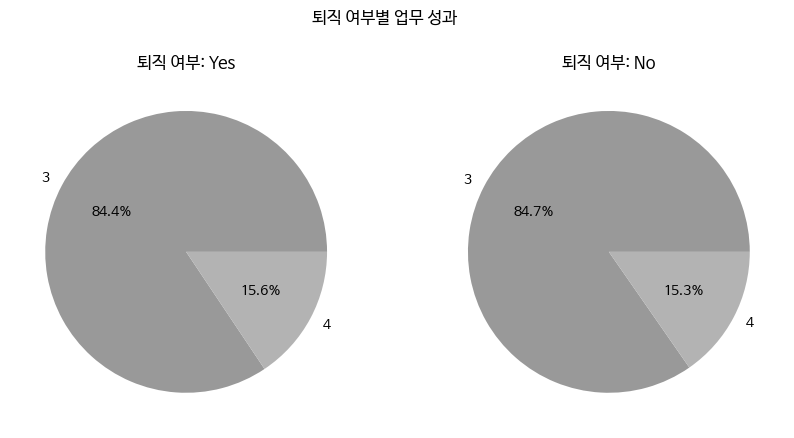

In [14]:
import matplotlib.pyplot as plt

# 퇴직 여부에 따른 업무 환경 만족도 데이터 추출
satisfaction_counts = df.groupby(['Attrition', 'PerformanceRating']).size()

#퇴직 여부에 대한 업무 환경 만족도 데이터 추출
yes_satisfaction = satisfaction_counts['Yes']
no_satisfaction = satisfaction_counts['No']

# 파이 차트 그리기
plt.figure(figsize=(10, 5))

# 색상 설정
colors = ['#999999', '#B3B3B3']

plt.subplot(1, 2, 1)
plt.pie(yes_satisfaction, labels=yes_satisfaction.index, autopct='%1.1f%%',colors=colors)
plt.title('퇴직 여부: Yes')

plt.subplot(1, 2, 2)
plt.pie(no_satisfaction, labels=no_satisfaction.index, autopct='%1.1f%%',colors=colors)
plt.title('퇴직 여부: No')

plt.suptitle('퇴직 여부별 업무 성과')
plt.show()


눈에 띄게 퇴직 여부별로 업무 성과에 있어 큰 차이가 나지 않는다.

## 1번의 과정을 총 35가지 요인(변수)에 대해 적용하여 살펴보고, 본인이 생각하기에 가장 중요한 요인으로 판단되는 요인을 3가지 이내로 선정하여 최소 1장 혹은 5장 이내의 보고서로 작성할 것

## Pycaret을 통한 피처 중요도 확인

In [16]:
from pycaret.classification import *

In [18]:
data = df


# PyCaret 설정
clf = setup(data=data, target='Attrition')

# 모델 비교 (LightGBM 모델 제외)
best_model = compare_models()


,Description,Value
0,Session id,7237
1,Target,Attrition
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(1470, 35)"
5,Transformed data shape,"(1470, 54)"
6,Transformed train set shape,"(1029, 54)"
7,Transformed test set shape,"(441, 54)"
8,Ordinal features,2
9,Numeric features,26


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,21:38:07
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8649,0.7609,0.8649,0.8513,0.8366,0.3243,0.3802,0.1420
ada,Ada Boost Classifier,0.8640,0.7870,0.8640,0.8466,0.8452,0.3755,0.4021,0.0900
lda,Linear Discriminant Analysis,0.8640,0.8140,0.8640,0.8497,0.8481,0.3916,0.4158,0.0540
ridge,Ridge Classifier,0.8610,0.0000,0.8610,0.8478,0.8206,0.2469,0.3261,0.0560
xgboost,Extreme Gradient Boosting,0.8601,0.7733,0.8601,0.8382,0.8355,0.3259,0.3607,0.0850
rf,Random Forest Classifier,0.8542,0.7749,0.8542,0.8421,0.8033,0.1673,0.2647,0.1370
et,Extra Trees Classifier,0.8523,0.7863,0.8523,0.8245,0.8064,0.1839,0.2547,0.1170
lr,Logistic Regression,0.8445,0.7525,0.8445,0.8201,0.8083,0.2046,0.2604,0.5680
knn,K Neighbors Classifier,0.8085,0.5717,0.8085,0.7510,0.7699,0.0518,0.0642,0.0580
dt,Decision Tree Classifier,0.7775,0.6049,0.7775,0.7851,0.7802,0.2026,0.2042,0.0570


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

LightGBM에서 오류가 발생하므로 상위 5개의 결과를 가지고 분석

In [19]:

# 모델 비교 (LightGBM 모델 제외)
best_model = compare_models(include=['lda', 'ridge', 'ada', 'gbc', 'xgboost'])


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8649,0.7609,0.8649,0.8513,0.8366,0.3243,0.3802,0.1520
lda,Linear Discriminant Analysis,0.8640,0.8140,0.8640,0.8497,0.8481,0.3916,0.4158,0.5010
ada,Ada Boost Classifier,0.8640,0.7870,0.8640,0.8466,0.8452,0.3755,0.4021,0.0930
ridge,Ridge Classifier,0.8610,0.0000,0.8610,0.8478,0.8206,0.2469,0.3261,0.0520
xgboost,Extreme Gradient Boosting,0.8601,0.7733,0.8601,0.8382,0.8355,0.3259,0.3607,0.0900


Processing:   0%|          | 0/25 [00:00<?, ?it/s]

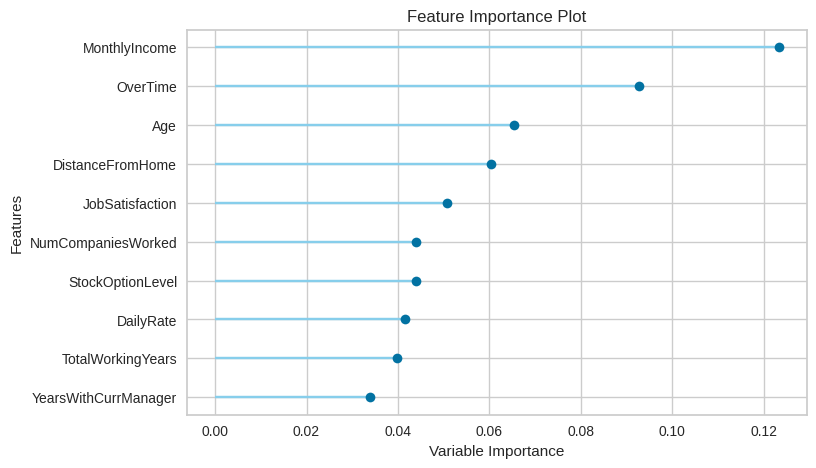

In [20]:
#변수 중요도 시각화
plot_model(best_model, plot='feature')

AutoML로 최적의 모델을 채택하고 종속변수, 즉 '퇴직 여부'에 대한 피처 중요도를 시각화 하였다.